In [1]:
import pandas as pd
import numpy as np

import statsmodels.formula.api as sm
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

###
df = pd.read_excel("IBM Employee Attrition.xlsx")
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [2]:
#replacing "Yes" & "No" with integer values for statistical measures later on with scipy.stats

df["Attrition"].replace(["Yes","No"],[1,0], inplace=True) #1 means YES, the IBM employee left work, #0 means the ibm employee stayed at and work for the company
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [3]:
df.shape

(1470, 30)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeNumber            1470 non-null   int64 
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [6]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,9.192517,2.912925,1024.865306,2.721769,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,8.106864,1.024165,602.024335,1.093082,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,491.250000,2.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1020.500000,3.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1555.750000,4.000000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2068.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [8]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [9]:
df.corr()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.001686,0.208034,-0.010145,0.010146,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.077924,-0.031373,-0.010577,-0.103369,-0.130016,-0.169105,-0.103481,-0.159840,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DistanceFromHome,-0.001686,0.077924,1.000000,0.021042,0.032916,-0.016075,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.021042,1.000000,0.042070,-0.027128,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,0.032916,0.042070,1.000000,0.017621,-0.006888,-0.018519,-0.046247,-0.014829,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,-0.016075,-0.027128,0.017621,1.000000,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,-0.130016,0.008783,0.042438,-0.006888,-0.008278,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.005303,0.101589,-0.018519,0.001212,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,-0.103481,-0.003669,-0.011296,-0.046247,-0.006784,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.159840,-0.017014,0.094961,-0.014829,-0.006259,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [10]:
## Create a copy of your dataset to filter outliers
dfz = df.copy()

## Check original shape of the dataset
print(dfz.shape)

(1470, 30)


<AxesSubplot:>

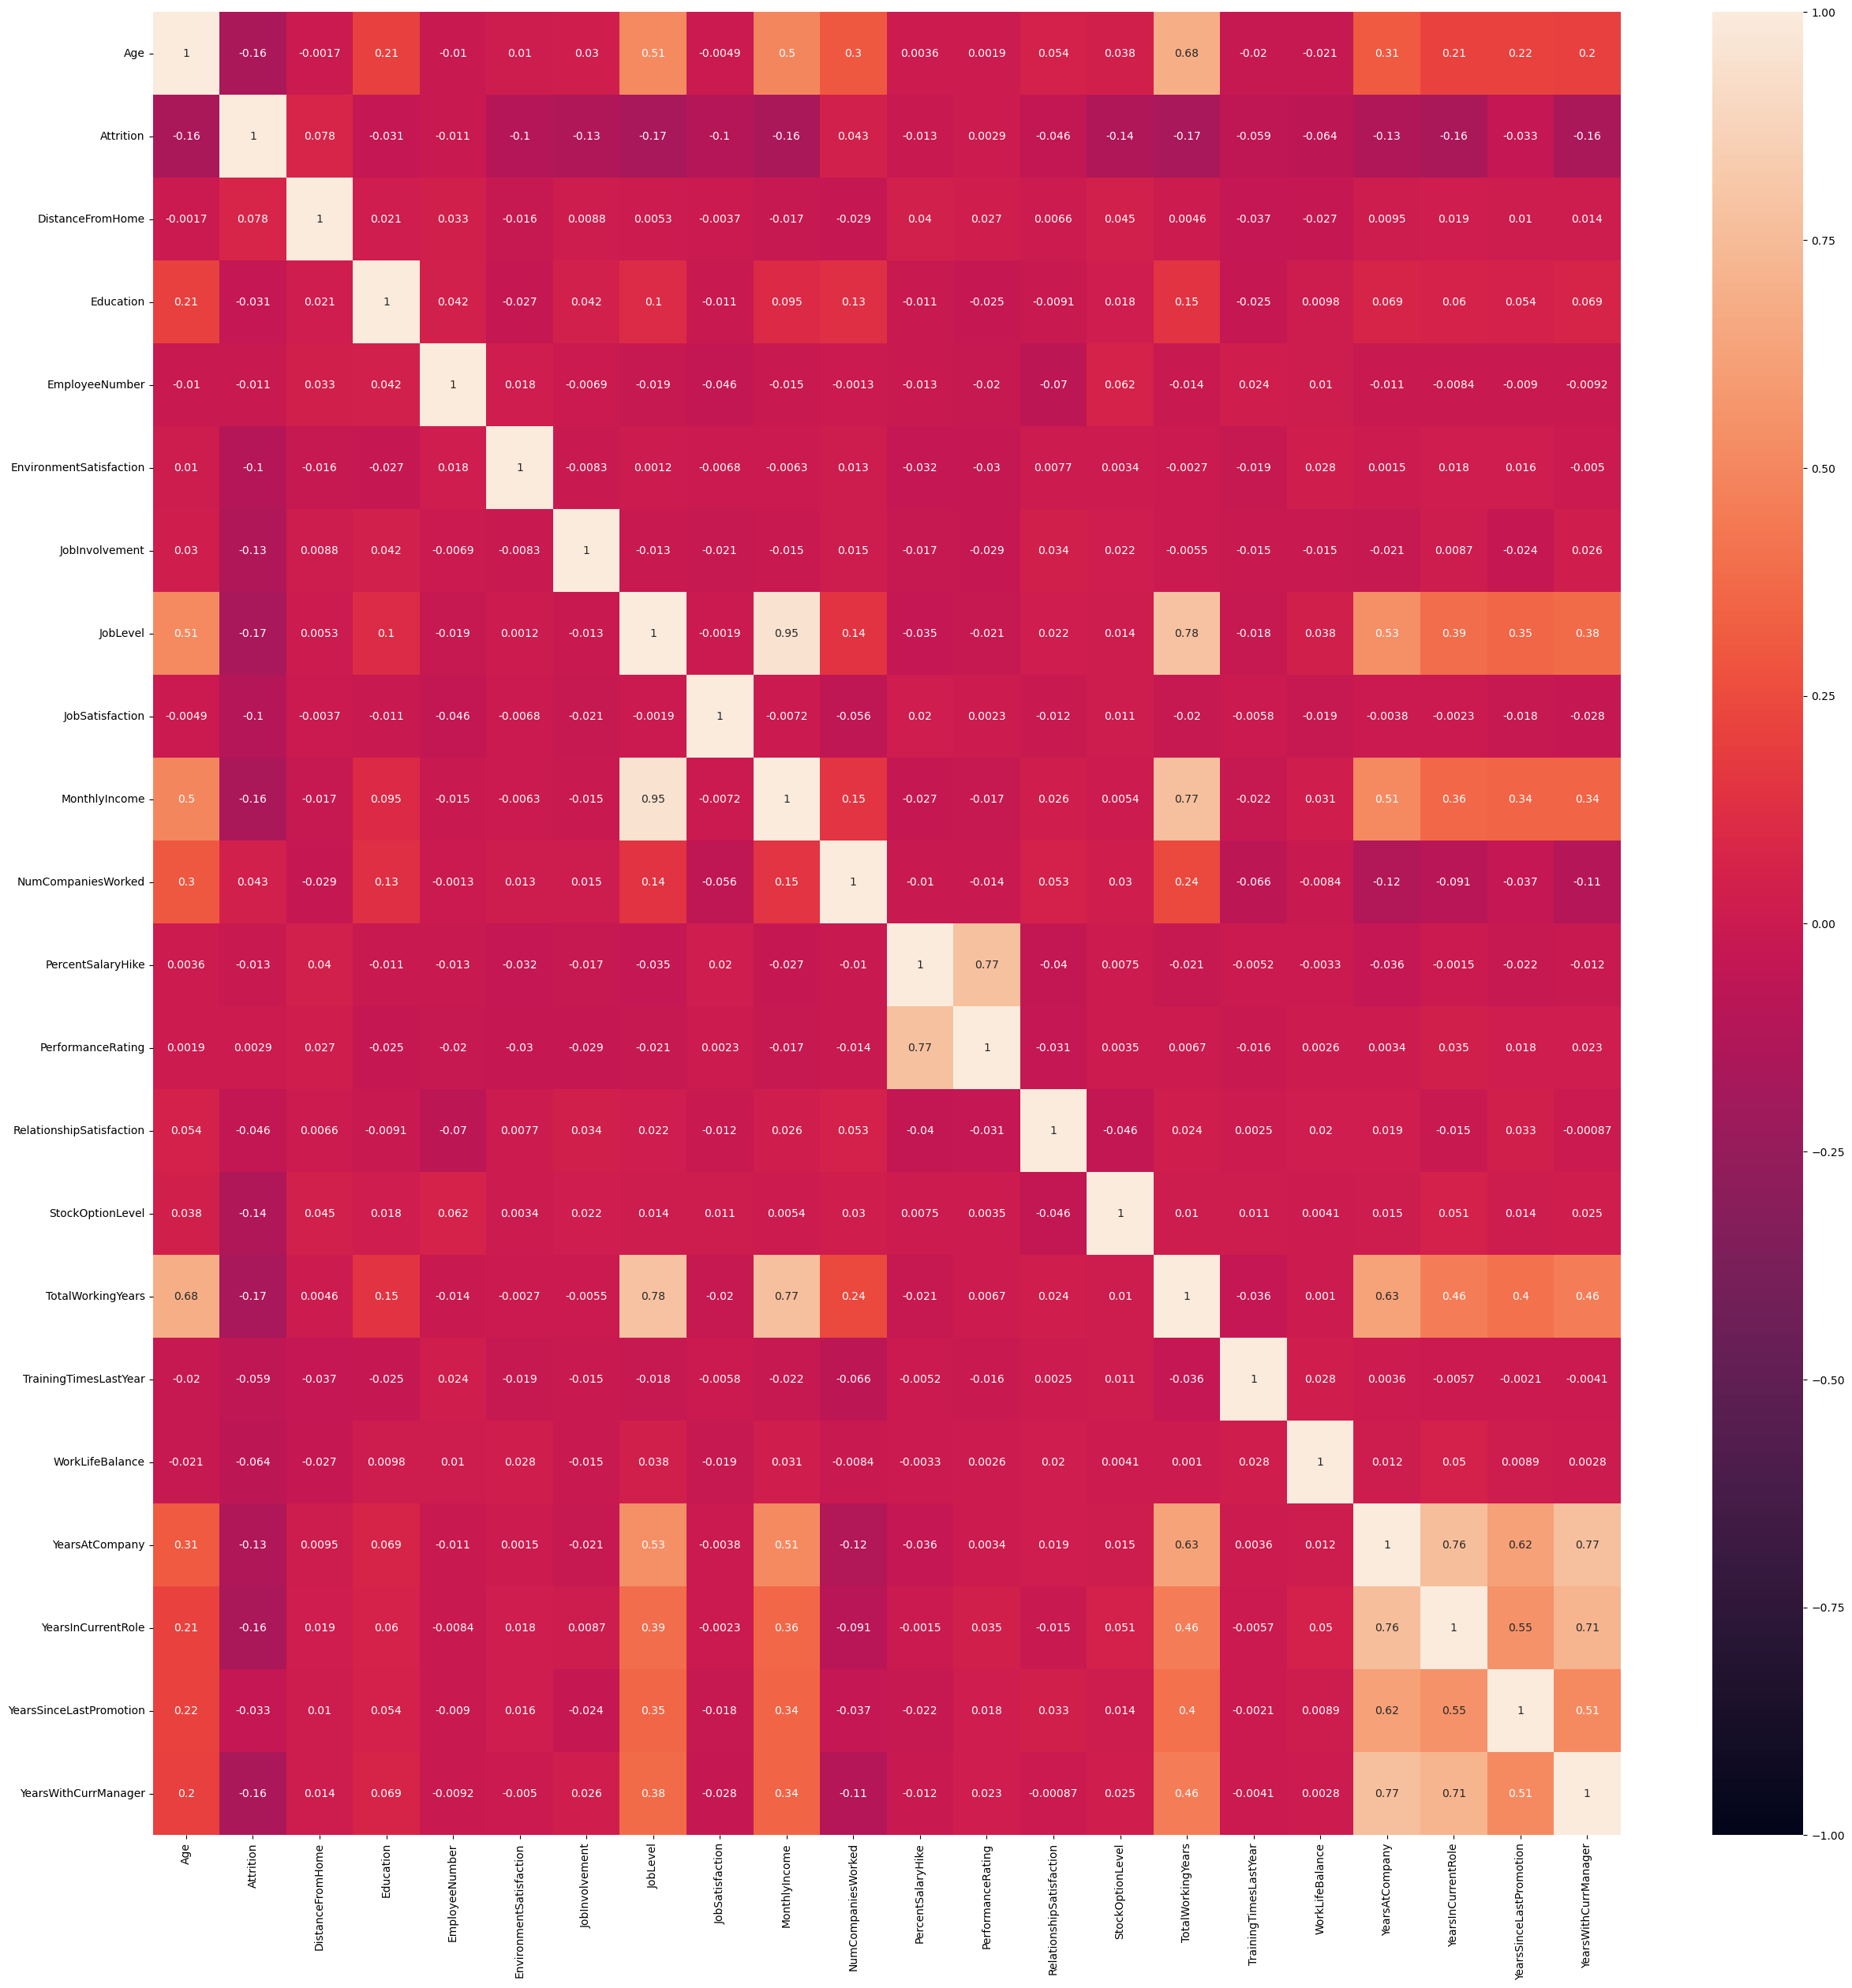

In [11]:
# show correlation of stats via heatmap
plt.figure(figsize=(30,30))

# calculate the correlation matrix for the numeric dataset 
corr = df.corr()

# plot a heat map to show the magnitude of the correlation between variables
sns.heatmap(corr, vmin = -1, annot = True)

In [12]:
##Possible variables that have a correlation with work attrition according to correlation percentages.##
#1. "JobLevel"
#2. "TotalWorkingYears"
#3. "YearsAtCompany"
#4. "YearsInCurrentRole" 
#5. "YearsWithCurrManager"

##Other variables I can draw insight on for work attrition for IBC company##
#6. "JobSatisfaction"
#7. "NumCompaniesWorked"
#8. "Overtime"
#9. "PercentSalaryHike"
#10. "PerforamceRating"
#11. "RelationshipSatisfaction"
#12. "WorkLifeBalance"

In [13]:
dfz = df.copy()

In [14]:
dfz.shape

(1470, 30)

In [15]:
dfz

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,Research & Development,23,2,Medical,2061,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,Research & Development,6,1,Medical,2062,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,Research & Development,4,3,Life Sciences,2064,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,Sales,2,3,Medical,2065,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [16]:
dfz["zscore_JobLevel"] = np.abs(stats.zscore(dfz["JobLevel"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,0,8,0,1,6,4,0,5,0.057788
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,4,1,10,3,3,10,7,1,7,0.057788
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,2,0,7,3,3,0,0,0,0,0.961486
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,0,8,3,3,8,7,3,0,0.961486
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,4,1,6,3,3,2,2,2,2,0.961486


In [17]:
z_outliers = dfz.loc[dfz["zscore_JobLevel"] > 3].index
print(z_outliers)

Int64Index([], dtype='int64')


In [18]:
df.iloc[[25,   29,   45,   62,  105,  106,  123,  165,  186,  187,  190,
             231,  233,  237,  244,  257,  270,  279,  290,  326,  329,  392,
             400,  411,  417,  473,  477,  497,  535,  538,  568,  584,  595,
             716,  741,  746,  749,  766,  770,  814,  851,  858,  869,  898,
             899,  904,  907,  913,  916,  918,  922,  936,  955,  956, 1009,
            1116, 1126, 1129, 1140, 1154, 1242, 1264, 1277, 1330, 1331, 1377,
            1401, 1437, 1443]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
25,53,0,Travel_Rarely,Research & Development,5,3,Other,32,3,Female,...,3,4,1,26,3,2,14,13,4,8
29,46,0,Travel_Rarely,Sales,2,4,Marketing,38,2,Female,...,3,4,0,22,2,2,2,2,2,1
45,41,1,Travel_Rarely,Research & Development,12,3,Technical Degree,58,2,Female,...,3,4,0,23,0,3,22,15,15,8
62,50,0,Travel_Rarely,Research & Development,7,2,Medical,80,2,Female,...,3,4,1,29,2,2,27,3,13,8
105,59,0,Non-Travel,Human Resources,2,4,Human Resources,140,3,Female,...,4,4,1,30,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1331,48,0,Travel_Rarely,Research & Development,10,3,Life Sciences,1867,4,Male,...,3,4,0,29,3,3,22,10,12,9
1377,49,0,Travel_Frequently,Research & Development,2,1,Life Sciences,1941,2,Male,...,3,4,0,28,3,3,5,4,4,3
1401,55,0,Travel_Rarely,Human Resources,26,4,Human Resources,1973,3,Male,...,3,1,1,35,0,3,10,9,1,4
1437,39,0,Non-Travel,Research & Development,9,3,Life Sciences,2022,4,Male,...,3,3,0,21,3,2,6,0,1,3


In [28]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1470, 31)


In [29]:
dfz["zscore_TotalWorkingYears"] = np.abs(stats.zscore(dfz["TotalWorkingYears"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0,8,0,1,6,4,0,5,0.057788,0.421642
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,10,3,3,10,7,1,7,0.057788,0.164511
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,0,7,3,3,0,0,0,0,0.961486,0.550208
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,0,8,3,3,8,7,3,0,0.961486,0.421642
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,1,6,3,3,2,2,2,2,0.961486,0.678774


In [30]:
z_outliers = dfz.loc[dfz["zscore_TotalWorkingYears"] > 3].index
print(z_outliers)

Int64Index([  85,   98,  126,  187,  270,  401,  445,  595,  624,  894,  956,
            1043, 1116, 1184, 1301, 1401],
           dtype='int64')


In [31]:
dfz.iloc[[85,   98,  126,  401,  424,  445,  534,  561,  624,  649,  714,
             867,  890,  894,  914,  962,  976, 1043, 1086, 1111, 1138, 1184,
            1301]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears
85,56,0,Travel_Rarely,Research & Development,7,3,Life Sciences,112,4,Male,...,0,37,3,2,6,4,0,2,0.845911,3.306758
98,58,0,Travel_Rarely,Sales,10,4,Medical,131,4,Male,...,0,38,1,2,37,10,1,8,1.749610,3.435323
126,58,1,Travel_Rarely,Research & Development,23,4,Medical,165,4,Female,...,1,40,3,2,40,10,15,6,0.845911,3.692454
401,56,0,Travel_Frequently,Sales,6,3,Life Sciences,532,3,Female,...,3,36,0,2,7,7,7,7,1.749610,3.178192
424,57,0,Travel_Rarely,Sales,29,3,Marketing,568,1,Male,...,1,32,3,2,1,0,0,0,1.749610,2.663930
445,55,0,Travel_Rarely,Sales,18,5,Life Sciences,597,1,Female,...,0,37,2,3,10,9,7,7,1.749610,3.306758
534,53,0,Travel_Rarely,Research & Development,7,3,Life Sciences,730,3,Male,...,0,32,3,3,5,1,1,3,1.749610,2.663930
561,52,0,Travel_Rarely,Sales,3,4,Marketing,776,3,Male,...,0,34,3,4,34,6,1,16,1.749610,2.921061
624,53,0,Travel_Rarely,Sales,7,2,Marketing,862,1,Female,...,1,35,3,3,5,2,0,4,0.845911,3.049627
649,53,0,Travel_Rarely,Research & Development,23,4,Life Sciences,901,4,Female,...,0,33,0,3,12,9,3,8,1.749610,2.792496


In [32]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1454, 32)


In [33]:
dfz["zscore_YearsAtCompany"] = np.abs(stats.zscore(dfz["YearsAtCompany"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears,zscore_YearsAtCompany
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,0,1,6,4,0,5,0.057788,0.421642,0.149908
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,10,3,3,10,7,1,7,0.057788,0.164511,0.529116
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,7,3,3,0,0,0,0,0.961486,0.550208,1.168445
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,8,3,3,8,7,3,0,0.961486,0.421642,0.189604
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,6,3,3,2,2,2,2,0.961486,0.678774,0.828933


In [34]:
z_outliers = dfz.loc[dfz["zscore_YearsAtCompany"] > 3].index
print(z_outliers)

Int64Index([  18,   62,  119,  190,  237,  390,  411,  425,  473,  477,  561,
             592,  653,  677,  749,  861,  914,  918,  922,  962, 1086, 1111,
            1135, 1138],
           dtype='int64')


In [19]:
dfz.loc[[18,   62,  119,  190,  237,  390,  411,  425,  473,  477,  561,
             592,  653,  677,  749,  861,  914,  918,  922,  962, 1086, 1111,
            1135, 1138]]


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel
18,53,0,Travel_Rarely,Sales,2,4,Life Sciences,23,1,Female,...,3,0,31,3,3,25,8,3,7,1.749610
62,50,0,Travel_Rarely,Research & Development,7,2,Medical,80,2,Female,...,4,1,29,2,2,27,3,13,8,2.653309
119,43,0,Travel_Frequently,Sales,26,2,Life Sciences,158,3,Male,...,4,2,25,3,4,25,12,4,12,1.749610
190,52,0,Travel_Rarely,Research & Development,1,4,Life Sciences,259,3,Male,...,1,1,34,5,3,33,18,11,9,2.653309
237,52,0,Non-Travel,Sales,2,4,Life Sciences,329,1,Male,...,4,0,33,2,4,33,7,15,12,2.653309
390,43,0,Travel_Rarely,Research & Development,12,3,Life Sciences,520,1,Male,...,3,1,25,3,3,25,10,3,9,1.749610
411,60,0,Travel_Rarely,Research & Development,7,3,Life Sciences,549,1,Female,...,4,0,33,5,1,29,8,11,10,2.653309
425,50,0,Travel_Rarely,Research & Development,29,4,Life Sciences,569,2,Male,...,2,1,28,2,3,27,10,15,7,1.749610
473,49,0,Travel_Rarely,Research & Development,18,4,Life Sciences,638,4,Male,...,3,1,31,5,3,31,9,0,9,2.653309
477,50,0,Travel_Frequently,Human Resources,3,3,Medical,644,1,Male,...,3,1,32,2,3,32,5,10,7,2.653309


In [20]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1470, 31)


In [21]:
dfz["zscore_YearsAtCompany"] = np.abs(stats.zscore(dfz["YearsAtCompany"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_YearsAtCompany
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0,8,0,1,6,4,0,5,0.057788,0.164613
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,1,10,3,3,10,7,1,7,0.057788,0.488508
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,0,7,3,3,0,0,0,0,0.961486,1.144294
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,0,8,3,3,8,7,3,0,0.961486,0.161947
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,1,6,3,3,2,2,2,2,0.961486,0.817734


In [22]:
z_outliers = dfz.loc[dfz["zscore_YearsAtCompany"] > 3].index
print(z_outliers)

Int64Index([  62,   98,  126,  190,  237,  270,  411,  425,  473,  477,  561,
             592,  595,  653,  677,  749,  861,  914,  918,  962, 1086, 1111,
            1116, 1135, 1138],
           dtype='int64')


In [25]:
dfz.iloc[[62,   98,  126,  190,  237,  270,  411,  425,  473,  477,  561,
             592,  595,  653,  677,  749,  861,  914,  918,  962, 1086, 1111]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_YearsAtCompany
62,50,0,Travel_Rarely,Research & Development,7,2,Medical,80,2,Female,...,1,29,2,2,27,3,13,8,2.653309,3.264271
98,58,0,Travel_Rarely,Sales,10,4,Medical,131,4,Male,...,0,38,1,2,37,10,1,8,1.749610,4.897073
126,58,1,Travel_Rarely,Research & Development,23,4,Medical,165,4,Female,...,1,40,3,2,40,10,15,6,0.845911,5.386914
190,52,0,Travel_Rarely,Research & Development,1,4,Life Sciences,259,3,Male,...,1,34,5,3,33,18,11,9,2.653309,4.243953
237,52,0,Non-Travel,Sales,2,4,Life Sciences,329,1,Male,...,0,33,2,4,33,7,15,12,2.653309,4.243953
270,55,0,Travel_Rarely,Research & Development,1,3,Medical,374,4,Male,...,0,37,2,3,36,10,4,13,2.653309,4.733793
411,60,0,Travel_Rarely,Research & Development,7,3,Life Sciences,549,1,Female,...,0,33,5,1,29,8,11,10,2.653309,3.590832
425,50,0,Travel_Rarely,Research & Development,29,4,Life Sciences,569,2,Male,...,1,28,2,3,27,10,15,7,1.749610,3.264271
473,49,0,Travel_Rarely,Research & Development,18,4,Life Sciences,638,4,Male,...,1,31,5,3,31,9,0,9,2.653309,3.917392
477,50,0,Travel_Frequently,Human Resources,3,3,Medical,644,1,Male,...,1,32,2,3,32,5,10,7,2.653309,4.080672


In [26]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1445, 32)


In [27]:
dfz["zscore_YearsInCurrentRole"] = np.abs(stats.zscore(dfz["YearsInCurrentRole"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_YearsAtCompany,zscore_YearsInCurrentRole
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,8,0,1,6,4,0,5,0.057788,0.164613,0.041390
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,10,3,3,10,7,1,7,0.057788,0.488508,0.800979
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,7,3,3,0,0,0,0,0.961486,1.144294,1.164548
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,8,3,3,8,7,3,0,0.961486,0.161947,0.800979
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,6,3,3,2,2,2,2,0.961486,0.817734,0.602969


In [28]:
z_outliers = dfz.loc[dfz["zscore_YearsInCurrentRole"] > 3].index
print(z_outliers)

Int64Index([  45,   63,  123,  187,  231,  281,  417,  466,  716,  746,  976,
            1024, 1150, 1156, 1221, 1327, 1351, 1430],
           dtype='int64')


In [29]:
dfz.loc[[45,   63,  123,  187,  231,  281,  417,  466,  716,  746,  976,
            1024, 1150, 1156, 1221, 1327, 1351, 1430]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_YearsAtCompany,zscore_YearsInCurrentRole
45,41,1,Travel_Rarely,Research & Development,12,3,Technical Degree,58,2,Female,...,23,0,3,22,15,15,8,2.653309,2.447870,3.047296
63,59,0,Travel_Rarely,Sales,25,3,Life Sciences,81,1,Female,...,28,3,2,21,16,7,9,0.845911,2.284590,3.328086
123,51,0,Travel_Rarely,Research & Development,6,3,Life Sciences,162,1,Male,...,23,5,3,20,18,15,15,2.653309,2.121310,3.889665
187,55,0,Travel_Rarely,Research & Development,14,4,Medical,254,3,Male,...,36,3,3,24,15,2,15,2.653309,2.774431,3.047296
231,42,0,Travel_Rarely,Research & Development,4,2,Technical Degree,319,3,Male,...,22,3,3,22,17,11,15,2.653309,2.447870,3.608876
281,42,0,Travel_Rarely,Sales,1,1,Life Sciences,387,2,Male,...,20,3,3,20,16,11,6,0.057788,2.121310,3.328086
417,40,0,Travel_Rarely,Sales,2,4,Life Sciences,558,3,Female,...,21,2,3,20,15,1,12,2.653309,2.121310,3.047296
466,41,0,Travel_Rarely,Sales,2,5,Life Sciences,625,2,Female,...,22,2,3,18,16,11,8,1.749610,1.794749,3.328086
716,41,0,Travel_Frequently,Research & Development,9,3,Medical,999,1,Male,...,21,2,4,18,16,0,11,2.653309,1.794749,3.328086
746,41,0,Non-Travel,Research & Development,7,1,Life Sciences,1035,2,Female,...,21,3,3,21,16,5,10,2.653309,2.284590,3.328086


In [50]:
dfz["zscore_YearsWithCurrManager"] = np.abs(stats.zscore(dfz["YearsWithCurrManager"]))
dfz.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_TotalWorkingYears,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,1,6,4,0,5,0.057788,0.421642,0.098409,0.029817,0.288086
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,3,10,7,1,7,0.057788,0.164511,0.678001,0.817290,0.862250
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,0,0,0,0,0.961486,0.550208,1.263023,1.159292,1.147324
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,8,7,3,0,0.961486,0.421642,0.289796,0.817290,1.147324
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,2,2,2,2,0.961486,0.678774,0.874818,0.594554,0.573160


In [30]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1427, 33)


In [31]:
dfz["zscore_YearsWithCurrManager"] = np.abs(stats.zscore(dfz["YearsWithCurrManager"]))
dfz.head()


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsWithCurrManager
0,41,1,Travel_Rarely,Sales,1,2,Life Sciences,1,2,Female,...,0,1,6,4,0,5,0.057788,0.164613,0.041390,0.298181
1,49,0,Travel_Frequently,Research & Development,8,1,Life Sciences,2,3,Male,...,3,3,10,7,1,7,0.057788,0.488508,0.800979,0.876704
2,37,1,Travel_Rarely,Research & Development,2,2,Other,4,4,Male,...,3,3,0,0,0,0,0.961486,1.144294,1.164548,1.148127
3,33,0,Travel_Frequently,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,8,7,3,0,0.961486,0.161947,0.800979,1.148127
4,27,0,Travel_Rarely,Research & Development,2,1,Medical,7,1,Male,...,3,3,2,2,2,2,0.961486,0.817734,0.602969,0.569604


In [33]:
z_outliers = dfz.loc[dfz["zscore_YearsWithCurrManager"] > 3].index
print(z_outliers)

Int64Index([28, 153, 386, 616, 635, 686, 875, 926, 1078, 1348], dtype='int64')


In [34]:
dfz.iloc[[28, 153, 386, 616, 635, 686, 875, 926, 1078, 1348]]

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,zscore_JobLevel,zscore_YearsAtCompany,zscore_YearsInCurrentRole,zscore_YearsWithCurrManager
28,44,0,Travel_Rarely,Research & Development,7,4,Medical,36,1,Female,...,4,3,22,6,5,17,0.845911,2.447870,0.520190,3.769319
159,34,0,Travel_Frequently,Sales,2,4,Marketing,216,3,Female,...,3,3,4,3,1,2,0.961486,0.491174,0.322179,0.569604
398,37,0,Non-Travel,Research & Development,25,5,Medical,529,2,Female,...,2,3,13,11,10,7,0.057788,0.978348,1.924138,0.876704
637,32,0,Non-Travel,Research & Development,1,3,Life Sciences,882,4,Male,...,2,3,3,0,0,2,0.961486,0.654454,1.164548,0.569604
657,29,0,Travel_Rarely,Research & Development,7,1,Medical,912,1,Female,...,5,3,4,3,0,3,0.961486,0.491174,0.322179,0.280342
709,31,1,Non-Travel,Research & Development,9,2,Medical,991,3,Male,...,0,3,3,2,1,2,0.961486,0.654454,0.602969,0.569604
902,27,0,Travel_Rarely,Research & Development,4,2,Life Sciences,1259,1,Male,...,2,3,5,3,0,3,0.961486,0.327893,0.322179,0.280342
955,55,0,Travel_Rarely,Research & Development,2,2,Medical,1336,4,Female,...,5,3,19,9,9,11,2.653309,1.958030,1.362558,2.033750
1112,38,1,Travel_Rarely,Research & Development,2,3,Medical,1573,3,Male,...,2,3,5,2,1,4,0.057788,0.327893,0.602969,0.008919
1390,28,1,Travel_Rarely,Research & Development,17,3,Technical Degree,1960,3,Male,...,2,2,4,1,0,3,0.961486,0.491174,0.883759,0.280342


In [35]:
dfz = dfz.drop(z_outliers)
print(dfz.shape)

(1417, 34)


In [36]:
mod1 = sm.logit('Attrition ~ JobLevel + TotalWorkingYears + YearsAtCompany + YearsInCurrentRole + YearsWithCurrManager', data=df).fit()

mod1.summary()

Optimization terminated successfully.
         Current function value: 0.415315
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 1470
Model:                          Logit   Df Residuals:                     1464
Method:                           MLE   Df Model:                            5
Date:                Sun, 14 May 2023   Pseudo R-squ.:                 0.05972
Time:                        15:08:19   Log-Likelihood:                -610.51
converged:                       True   LL-Null:                       -649.29
Covariance Type:            nonrobust   LLR p-value:                 2.720e-15
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.4793      0.162     -2.958      0.003      -0.797      -0.162
JobLevel                -0.2996      0.122     -2.465      0.014      -0.538      -0.061
TotalWorkingYears       -0.0352      0.019     -1.849      0.064      -0.073       0.002
YearsAtCompany           0.0777      0.028      2.766      0.006       0.023       0.133
YearsInCurrentRole      -0.1083      0.038     -2.850      0.004      -0.183      -0.034
YearsWithCurrManager    -0.0977      0.038     -2.542      0.011      -0.173      -0.022
========================================================================================
"""

In [37]:
##Coefficient Interpretations

mod1.params

Intercept              -0.479287
JobLevel               -0.299589
TotalWorkingYears      -0.035219
YearsAtCompany          0.077651
YearsInCurrentRole     -0.108290
YearsWithCurrManager   -0.097739
dtype: float64

In [38]:
##Odds Ratio (OR)

#An Odds Ratio (OR) is a measure of association between an event and an outcome. The OR represents the odds that an outcome will occur given a specific event/exposure, compared to the odds of the outcome occuring without the event/exposure. We can convert our model coefficients to odds ratios which will be easier to interpret.

#* OR > 1 indicates increased occurrence of an event
#* OR < 1 indicates decreased occurrence of an event 

dfz_odds = pd.DataFrame(np.exp(mod1.params), columns = ['OR'])

## pull the pvalues directly from the model

dfz_odds["pvalue"] = mod1.pvalues

## create a variable to quickly determine sig

dfz_odds["Sig"] = np.where(dfz_odds["pvalue"] <= 0.05, "Sig", "Not Sig")

## print new dataset

dfz_odds

,OR,pvalue,Sig
Intercept,0.619225,0.003092,Sig
JobLevel,0.741122,0.013687,Sig
TotalWorkingYears,0.965394,0.064484,Not Sig
YearsAtCompany,1.080745,0.005673,Sig
YearsInCurrentRole,0.897367,0.004369,Sig
YearsWithCurrManager,0.906885,0.011028,Sig


In [39]:
dfz_odds["Pct Change"] = (dfz_odds["OR"] - 1) * 100

dfz_odds

,OR,pvalue,Sig,Pct Change
Intercept,0.619225,0.003092,Sig,-38.077520
JobLevel,0.741122,0.013687,Sig,-25.887757
TotalWorkingYears,0.965394,0.064484,Not Sig,-3.460616
YearsAtCompany,1.080745,0.005673,Sig,8.074548
YearsInCurrentRole,0.897367,0.004369,Sig,-10.263281
YearsWithCurrManager,0.906885,0.011028,Sig,-9.311466


In [40]:
dfz["Attrition"].groupby(dfz["YearsWithCurrManager"]).mean()

YearsWithCurrManager
0     0.325670
1     0.144737
2     0.145349
3     0.133803
4     0.113402
5     0.129032
6     0.115385
7     0.146919
8     0.079208
9     0.071429
10    0.136364
11    0.050000
12    0.000000
13    0.000000
14    0.400000
Name: Attrition, dtype: float64

In [ ]:
#My first recommendation to HR according to the data being represented attrition and YearswithCurrManager would be:
#1. do private consultations with clients on a quarterly basis and ask what can be done to promote/increase work relationship with their manager
#2. have the managers take leadership courses to help them improve their employee relationships and increase worker retention.

Text(0.5, 1.0, 'IBM Work Attrition by YearsWithCurrManager')

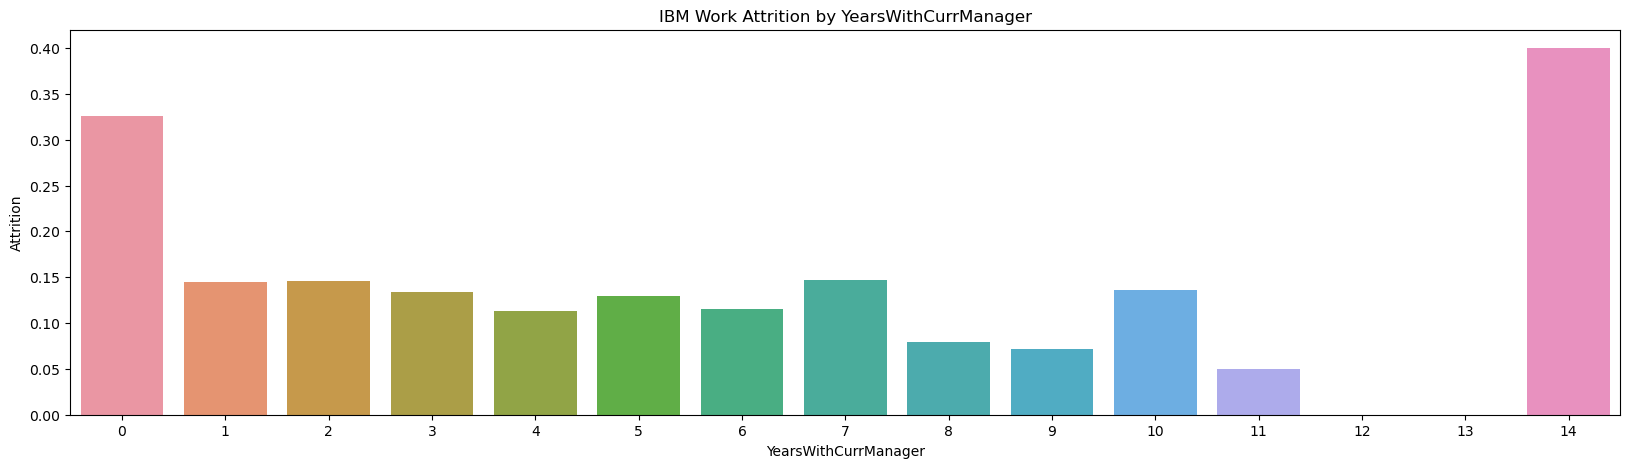

In [42]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "YearsWithCurrManager", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by YearsWithCurrManager')

Text(0.5, 1.0, 'IBM Work Attrition by YearsWithCurrManager')

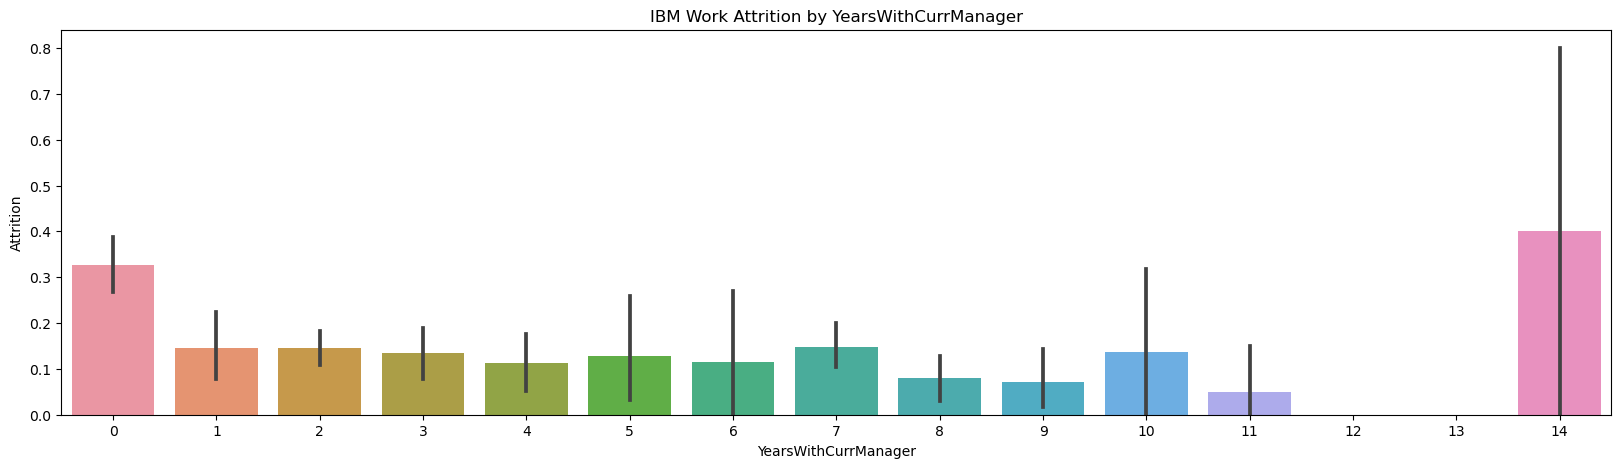

In [43]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "YearsWithCurrManager", y = "Attrition") #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by YearsWithCurrManager')

In [44]:
dfz["Attrition"].groupby(dfz["YearsInCurrentRole"]).mean()

YearsInCurrentRole
0     0.300412
1     0.192982
2     0.182796
3     0.119403
4     0.144231
5     0.028571
6     0.066667
7     0.138249
8     0.080460
9     0.096774
10    0.041667
11    0.000000
12    0.100000
13    0.076923
14    0.000000
Name: Attrition, dtype: float64

In [45]:
pd.crosstab(dfz["Attrition"],dfz["YearsInCurrentRole"], margins=True,normalize=False)

YearsInCurrentRole,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,All
Attrition,,,,,,,,,,,,,,,,
0,170,46,304,118,89,34,28,187,80,56,23,21,9,12,8,1185
1,73,11,68,16,15,1,2,30,7,6,1,0,1,1,0,232
All,243,57,372,134,104,35,30,217,87,62,24,21,10,13,8,1417


In [ ]:
## According to the data, I would notify HR, attrition and YearsInCurrentRole is the result of burning and stress.
#They will need an intervention plan.

Text(0.5, 1.0, 'IBM Work Attrition by YearsInCurrentRole')

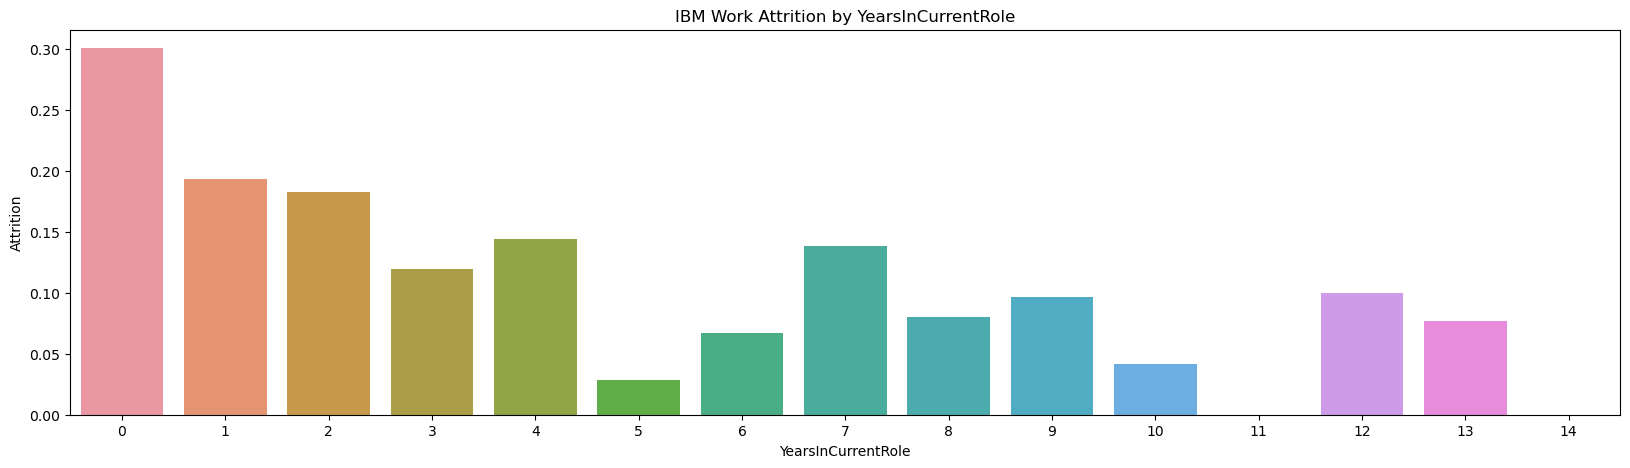

In [46]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "YearsInCurrentRole", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by YearsInCurrentRole')

In [47]:
dfz["Attrition"].groupby(dfz["YearsAtCompany"]).mean()

YearsAtCompany
0     0.363636
1     0.345029
2     0.212598
3     0.156250
4     0.172727
5     0.107143
6     0.118421
7     0.122222
8     0.112500
9     0.097561
10    0.150000
11    0.062500
12    0.000000
13    0.083333
14    0.111111
15    0.050000
16    0.090909
17    0.142857
18    0.142857
19    0.125000
20    0.050000
21    0.090909
22    0.000000
23    1.000000
24    0.200000
25    0.000000
Name: Attrition, dtype: float64

In [48]:
pd.crosstab(dfz["Attrition"], dfz["YearsAtCompany"], margins=True, normalize=False)

YearsAtCompany,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,All
Attrition,,,,,,,,,,,,,,,,,,,,,
0,28,112,100,108,91,175,67,79,71,74,...,6,6,7,19,10,11,0,4,4,1185
1,16,59,27,20,19,21,9,11,9,8,...,1,1,1,1,1,0,1,1,0,232
All,44,171,127,128,110,196,76,90,80,82,...,7,7,8,20,11,11,1,5,4,1417


In [ ]:
#Comparing attrition and YearsAtCompany, people are leaving. It may be wise to have HR 
#provide incentive for performance to reduce work attrition.


Text(0.5, 1.0, 'IBM Work Attrition by YearsAtCompany')

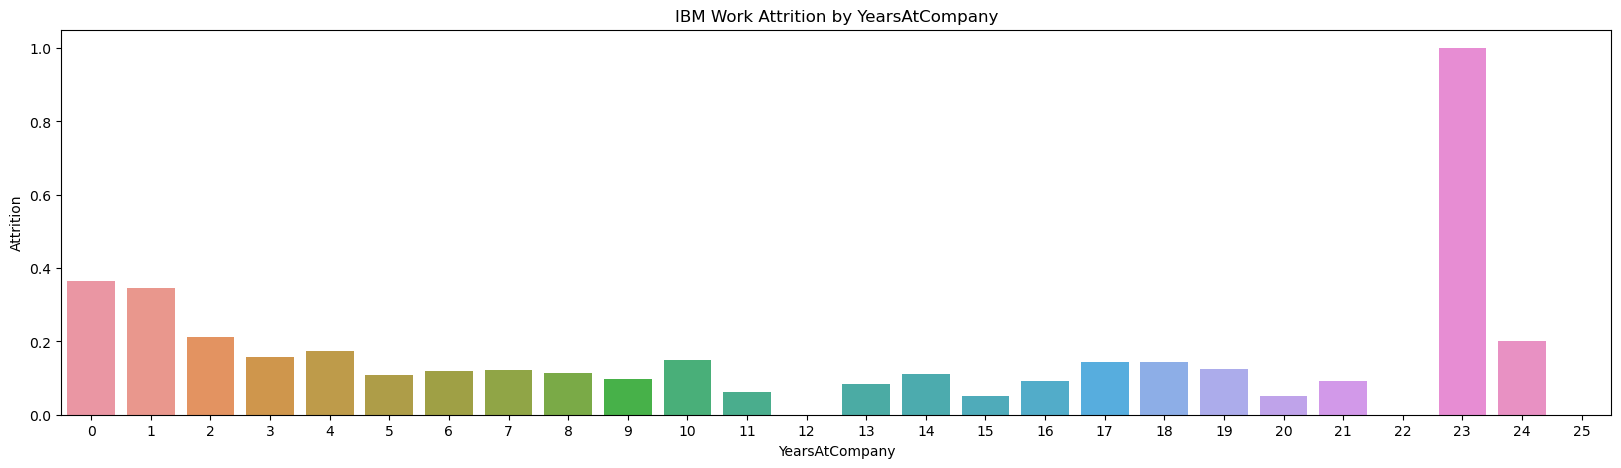

In [49]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "YearsAtCompany", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by YearsAtCompany')

In [50]:
dfz["Attrition"].groupby(dfz["JobLevel"]).mean()

JobLevel
1    0.264325
2    0.098113
3    0.144231
4    0.057471
5    0.039216
Name: Attrition, dtype: float64

Text(0.5, 1.0, 'IBM Work Attrition by JobLevel')

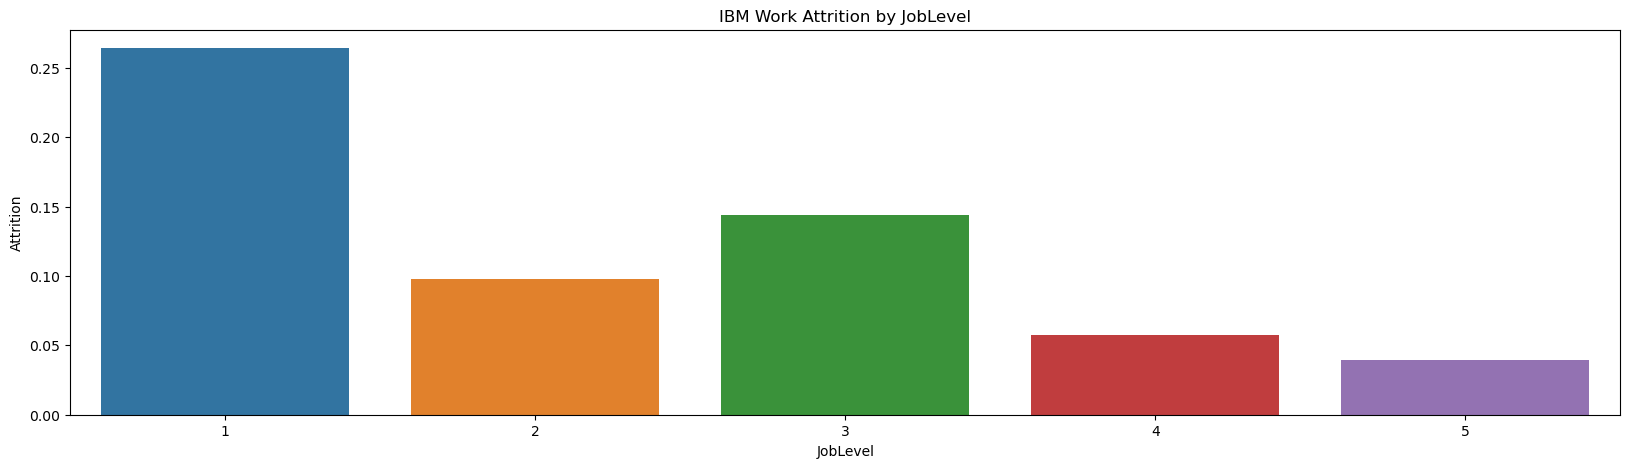

In [51]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "JobLevel", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by JobLevel')

In [ ]:
#According to the data, attrition and years at the company, HR will need to invest 
#resources for level 1 staff. These staff will need training to move up and retain them. 
#The resource could be increase pay and add incentives.  

In [52]:
dfz["Attrition"].groupby(dfz["TotalWorkingYears"]).mean()

TotalWorkingYears
0     0.454545
1     0.493827
2     0.290323
3     0.214286
4     0.190476
5     0.181818
6     0.176000
7     0.222222
8     0.155340
9     0.104167
10    0.123762
11    0.194444
12    0.104167
13    0.083333
14    0.129032
15    0.125000
16    0.083333
17    0.093750
18    0.160000
19    0.136364
20    0.080000
21    0.032258
22    0.111111
23    0.052632
24    0.200000
25    0.083333
26    0.083333
27    0.000000
28    0.090909
29    0.000000
30    0.000000
31    0.166667
32    0.000000
33    0.000000
34    0.000000
35    0.000000
36    0.000000
37    0.000000
Name: Attrition, dtype: float64

In [53]:
pd.crosstab(dfz["Attrition"], dfz["TotalWorkingYears"], margins=True, normalize=False)

TotalWorkingYears,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,All
Attrition,,,,,,,,,,,,,,,,,,,,,
0,6,41,22,33,51,72,103,63,87,86,...,7,7,5,6,2,1,3,4,3,1185
1,5,40,9,9,12,16,22,18,16,10,...,0,0,1,0,0,0,0,0,0,232
All,11,81,31,42,63,88,125,81,103,96,...,7,7,6,6,2,1,3,4,3,1417


Text(0.5, 1.0, 'IBM Work Attrition by TotalWorkingYears')

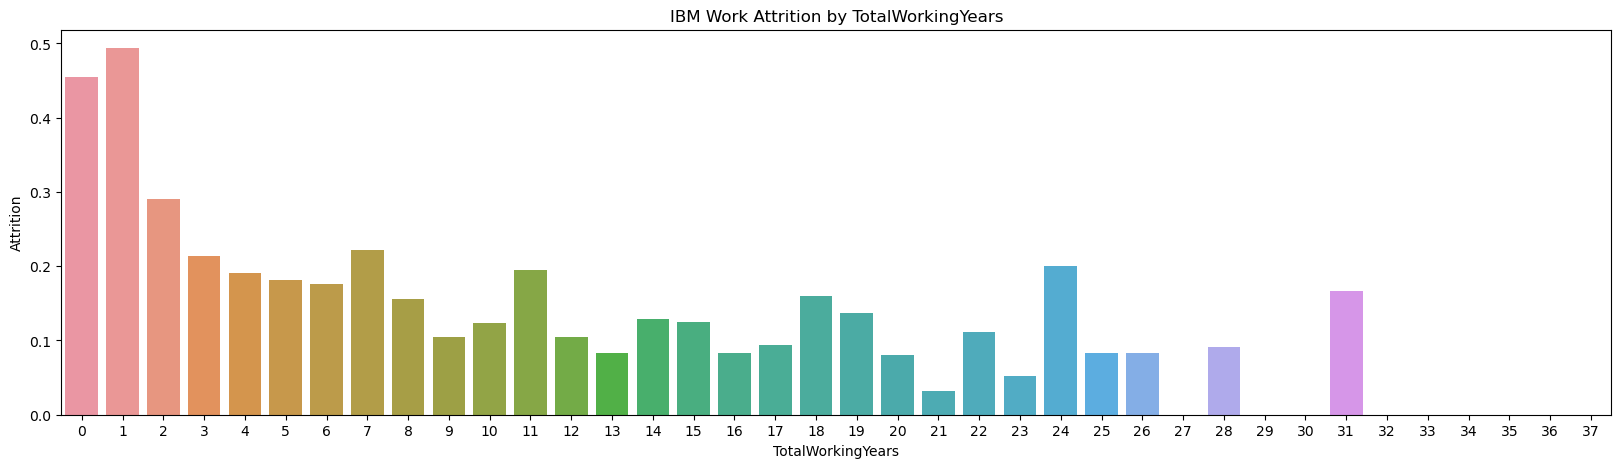

In [54]:
plt.figure(figsize=(20,5))

sns.barplot(data = dfz, x = "TotalWorkingYears", y = "Attrition", ci = False) #we can also take off the CI to explore/illustrate the confidence interval estimation

plt.xticks(rotation = 360)
plt.title('IBM Work Attrition by TotalWorkingYears')